# matplotlib + 한글 (OSX)

* 사용가능한 폰트 확인, TTF 폰트 설치 방법
* matplotlib 텍스트 출력시 폰트 특성을 지정 (FontProperties)
* matplotlib 전역으로 한글 글꼴 지정(rcParams)

<img src="http://i.imgur.com/Kvx2GHB.png">

### 2017 FinanceData http://facebook.com/financedata
<!-- TEASER_END -->

In [1]:
%matplotlib inline

# 기본정보 확인

In [2]:
# 실행중인 운영체제 확인

import platform
platform.platform()

'Darwin-16.6.0-x86_64-i386-64bit'

In [3]:
# 파이썬 버전

import sys
sys.version_info

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

In [4]:
# matplotlib 주요 설치 정보

import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

버전:  2.0.2
설치위치:  /Users/plusjune/.pyenv/versions/3.5.2/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py
설정:  /Users/plusjune/.matplotlib
캐시:  /Users/plusjune/.matplotlib


# 한글이 포함된 간단한 차트

In [15]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -13,   43,   -3,  -23, -115, -146, -108,  -36,   32,   63,  -14,
         60,   48,  110,   31,  107,   40,  131,  195,  105,   58,   20,
        -31,  -15,   69,    9,   87,  104,   82,   28,    6,   47,   96,
         73,   26,  -52,   47,   80,   30,   61,  148,  126,   71,   39,
         80,   88,   90,  171,  133,  203])

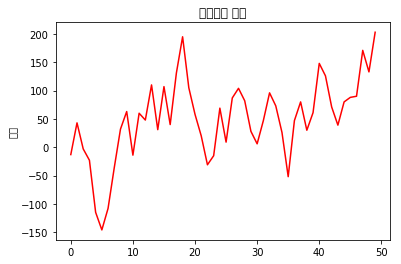

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이')
plt.ylabel('가격')
plt.show()

한글이 제대로 표시되지 않는다. 한글 폰트가 설치되어 있지 않거나, 한글 폰트를 사용하도록 설정되어 있지 않은 경우이다.

# 사용가능한 시스템의 TTF 폰트 목록

In [29]:
import matplotlib.font_manager as font_manager

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 전체개수
print(len(font_list)) 

# 처음 10개만 출력
font_list[:10] 

169


['/Library/Fonts/Chalkduster.ttf',
 '/Library/Fonts/Mishafi.ttf',
 '/Library/Fonts/InaiMathi.ttf',
 '/Library/Fonts/STIXIntSmReg.otf',
 '/Library/Fonts/Times New Roman Italic.ttf',
 '/Library/Fonts/Wingdings.ttf',
 '/System/Library/Fonts/SFCompactDisplay-Heavy.otf',
 '/Library/Fonts/AppleMyungjo.ttf',
 '/System/Library/Fonts/SFNSDisplayCondensed-Light.otf',
 '/Library/Fonts/Hoefler Text Ornaments.ttf']

# 사용 가능한 ttf 폰트 목록

사용가능한 ttf(true type font)폰트 목록은 다음 리스트로 간단하게 얻을 수 있다

```
matplotlib.font_manager.fontManager.ttflist
```

In [32]:
import matplotlib
import matplotlib.font_manager

font_list = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(len(font_list))

font_list[:10]

206


['STIXSizeFourSym',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'cmb10',
 'cmss10',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono']

사용가능한 폰트 목록 중 나눔글꼴(이름에 'Nanum'이 포함된) 폰트 목록만 추출

In [33]:
import matplotlib
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumMyeongjo',
 'NanumGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'Nanum Pen Script',
 'NanumMyeongjo',
 'Nanum Brush Script']

In [34]:
[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

[('NanumMyeongjo', '/Users/plusjune/Library/Fonts/NanumMyeongjoBold.ttf'),
 ('NanumGothic', '/Users/plusjune/Library/Fonts/NanumGothicExtraBold.ttf'),
 ('NanumGothic', '/Users/plusjune/Library/Fonts/NanumGothicBold.ttf'),
 ('NanumGothic', '/Users/plusjune/Library/Fonts/NanumGothic.ttf'),
 ('NanumMyeongjo', '/Users/plusjune/Library/Fonts/NanumMyeongjoExtraBold.ttf'),
 ('Nanum Pen Script', '/Users/plusjune/Library/Fonts/NanumPen.ttf'),
 ('NanumMyeongjo', '/Users/plusjune/Library/Fonts/NanumMyeongjo.ttf'),
 ('Nanum Brush Script', '/Users/plusjune/Library/Fonts/NanumBrush.ttf')]

# 폰트를 지정하는 두가지 방법

matplotlib에서 폰트를 지정하여 출력하는 하는 대표적인 방법은 크기 두 가지이다.

1. 텍스트 출력시 폰트 특성을 지정: FontProperties 속성으로 폰트 속성을 지정
1. 전역으로 지정: rcParams 을 사용하여 전역으로 설정값을 지정



# 텍스트 출력시 폰트 특성을 지정

텍스트를 출력하는 다음 함수들을 사용할 때, fontproperties 인자에 폰트를 지정할 수 있다.

matplotlib.pyplot
* title()
* xlabel()
* ylabel()
* legend()
* text()

matplotlib.axes 
* set_title()

예를 들어, 다음과 같이 텍스트와 폰트를 지정하여 출력할 수 있다.
* plt.text(0, 0, "Sample Text", fontproperties=fontprop)

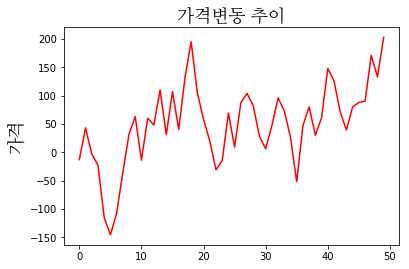

In [35]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/Users/plusjune/Library/Fonts/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.show()

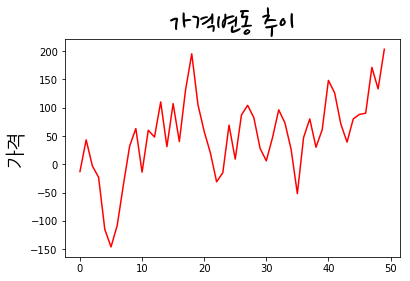

In [36]:
# TTF폰트 파일을 직접 지정하는 방법 (나눔 펜 글씨)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path_gothic = '/Users/plusjune/Library/Fonts/NanumGothic.ttf'
fontprop1 = fm.FontProperties(fname=path_gothic, size=20)

path_pen = '/Users/plusjune/Library/Fonts/NanumPen.ttf'
fontprop2 = fm.FontProperties(fname=path_pen, size=34)

plt.plot(range(50), data, 'r')
plt.ylabel('가격', fontproperties=fontprop1)
plt.title('가격변동 추이', fontproperties=fontprop2)
plt.show()

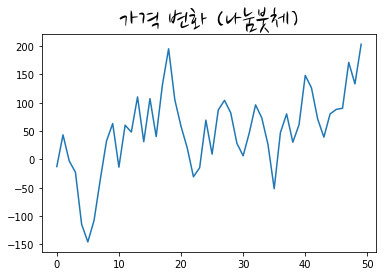

In [40]:
path = '/Users/plusjune/Library/Fonts/NanumBrush.ttf'
prop = fm.FontProperties(fname=path, size=28)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('가격 변화 (나눔붓체)', fontproperties=prop)

plt.show()

ttf 폰트 파일을 복사해서 바로 사용할 수 도 있다. 현재 디렉토리에 MalgunGothic.ttf 파일을 복사하여 다음과 같이 ttf 파일을 지정하여 사용할  수 있다.

In [42]:
ll MalgunGothic.ttf

-rw-------  1 plusjune  staff  3997212  8  7 15:45 MalgunGothic.ttf


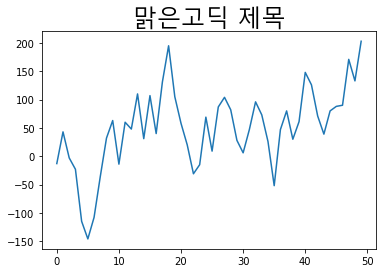

In [43]:
import matplotlib.font_manager as fm

fontprop = fm.FontProperties(fname="./MalgunGothic.ttf", size=24)

plt.title('맑은고딕 제목', fontproperties=fontprop)
plt.plot(data)
plt.show()

# 전역 글꼴 설정: matplotlib.rcParams[]

matplotlib.rcParams을 통해 matplotlib의 다양한 설정값을 읽거나 지정할 수 있다.

https://matplotlib.org/users/customizing.html

In [44]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print (plt.rcParams['font.size'] ) 
print (plt.rcParams['font.family'] )

10.0
['sans-serif']


In [45]:
# serif, sans-serif, monospace
print (plt.rcParams['font.serif']) 
print (plt.rcParams['font.sans-serif']) 
print (plt.rcParams['font.monospace']) 

['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


폰트의 기본값들을 다음과 같이 설정할 수 있다

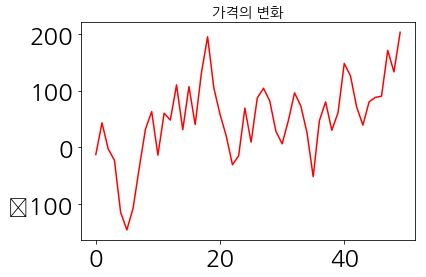

In [47]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['font.size'] = 12.
plt.rcParams['xtick.labelsize'] = 24.
plt.rcParams['ytick.labelsize'] = 24.
plt.rcParams['axes.labelsize'] = 20.

plt.title('가격의 변화')
plt.plot(range(50), data, 'r')
plt.show()

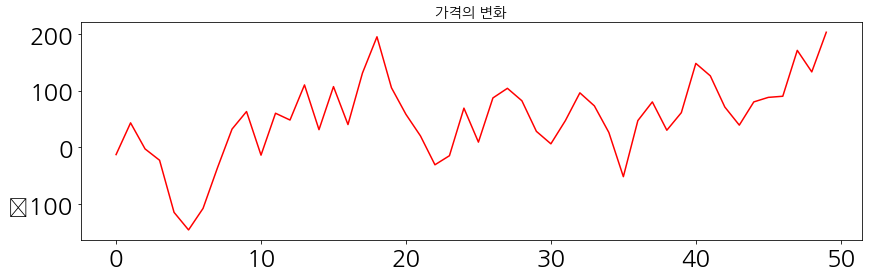

In [48]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

plt.title('가격의 변화')
plt.plot(range(50), data, 'r')
plt.show()

레이블에 '-'가 있는 경우 유니코드의 '-'문자를 그대로 출력하면 '-' 부호만 깨져 보인다. 이를 방지하기 위해 'axes.unicode_minus' 옵션을 False로 지정한다.

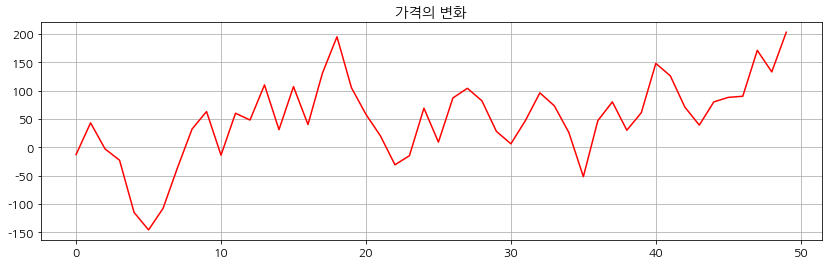

In [49]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 
plt.rcParams['axes.unicode_minus'] = False

plt.title('가격의 변화')
plt.plot(range(50), data, 'r')
plt.show()

# ttf 파일에서 폰트 이름 얻어 전역 설정
"font.family"에 지정할 이름을 .ttf 파일로 부터 얻을 수 있다

In [50]:
from matplotlib import font_manager, rc

font_fname = '/Users/plusjune/Library/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
print(font_name)

NanumGothic


# 참고

In [53]:
# matplotlib 설정 파일의 위치

matplotlib.matplotlib_fname()

'/Users/plusjune/.pyenv/versions/3.5.2/envs/py35/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc'

In [54]:
# 캐쉬 디렉토리

matplotlib.get_cachedir()

'/Users/plusjune/.matplotlib'

----
### 2017 FinanceData http://financedata.github.com , http://fb.com/financedata